#Simple Linear Regression

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from pandas_profiling import ProfileReport
import numpy as np

In [8]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [10]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [12]:
# Read the Data and check the Column Names to check the Space in the Names
col_names=df.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample Data:")
print(df.head())

Column names:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Sample Data:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [13]:
#Rename columns
df=df.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

In [14]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [15]:
print('Shape of the data:')
df.shape

Shape of the data:


(500, 9)

In [16]:
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


no          0
gre         0
toefl       0
rating      0
sop         0
lor         0
gpa         0
research    0
chance      0
dtype: int64

In [ ]:
df.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The mean, or average.
50% aka Median it is very import to understand Skeweness of the Data
The standard deviation, or how spread out the data is.
The minimum and maximum value of each column
The number of items that fall within the first, second, and third percentiles.

In [19]:
df.groupby('rating').mean()

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.

In [20]:
df[df['chance']>0.82].groupby('chance').mean()

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


#Several observations:
Average GPAs of those with higher level of chance to admit is greater than 9 where the data average is 8.57.
Average LOR, SOP, GRE and TOEFL grades of those with higher level of chance to admit is greater than the data average.
Research Shows us 75% Research Experience so there may be chances to Reject the Application in the next we take more than 83%

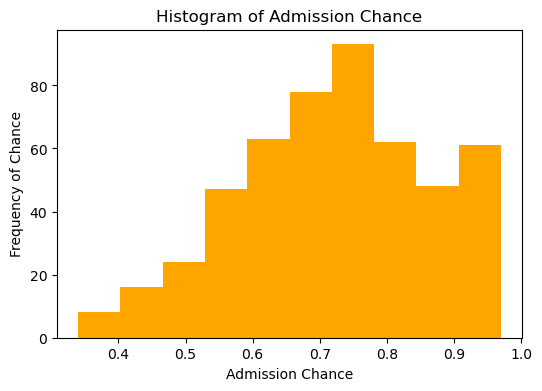

In [21]:
#Data Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['chance'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

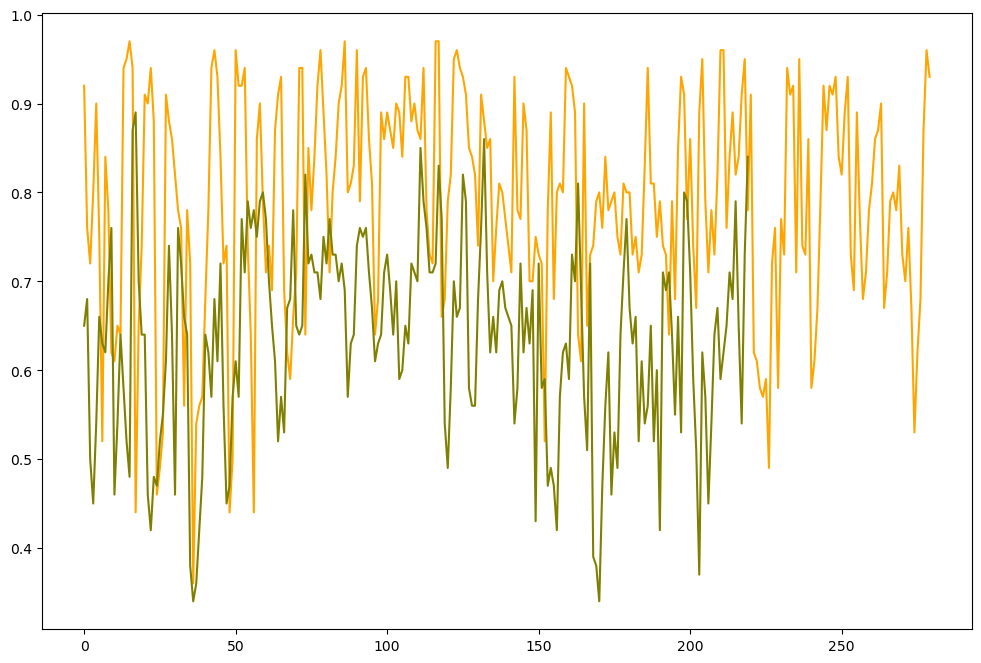

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df[df['research']==1])), df[df['research']==1]['chance'], color='orange')
plt.plot(range(len(df[df['research']==0])), df[df['research']==0]['chance'], color='olive')
plt.show()

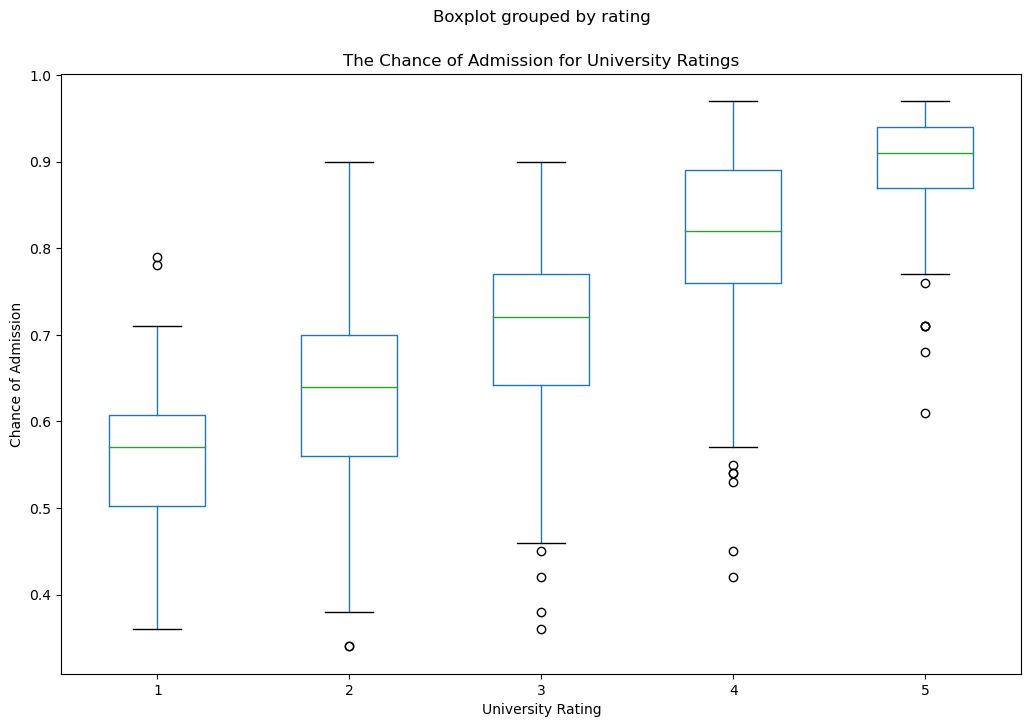

In [23]:
df.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

As it can be seen from the boxplot chart, chance of admission is higher within the applicants of lower rated (5) universities.

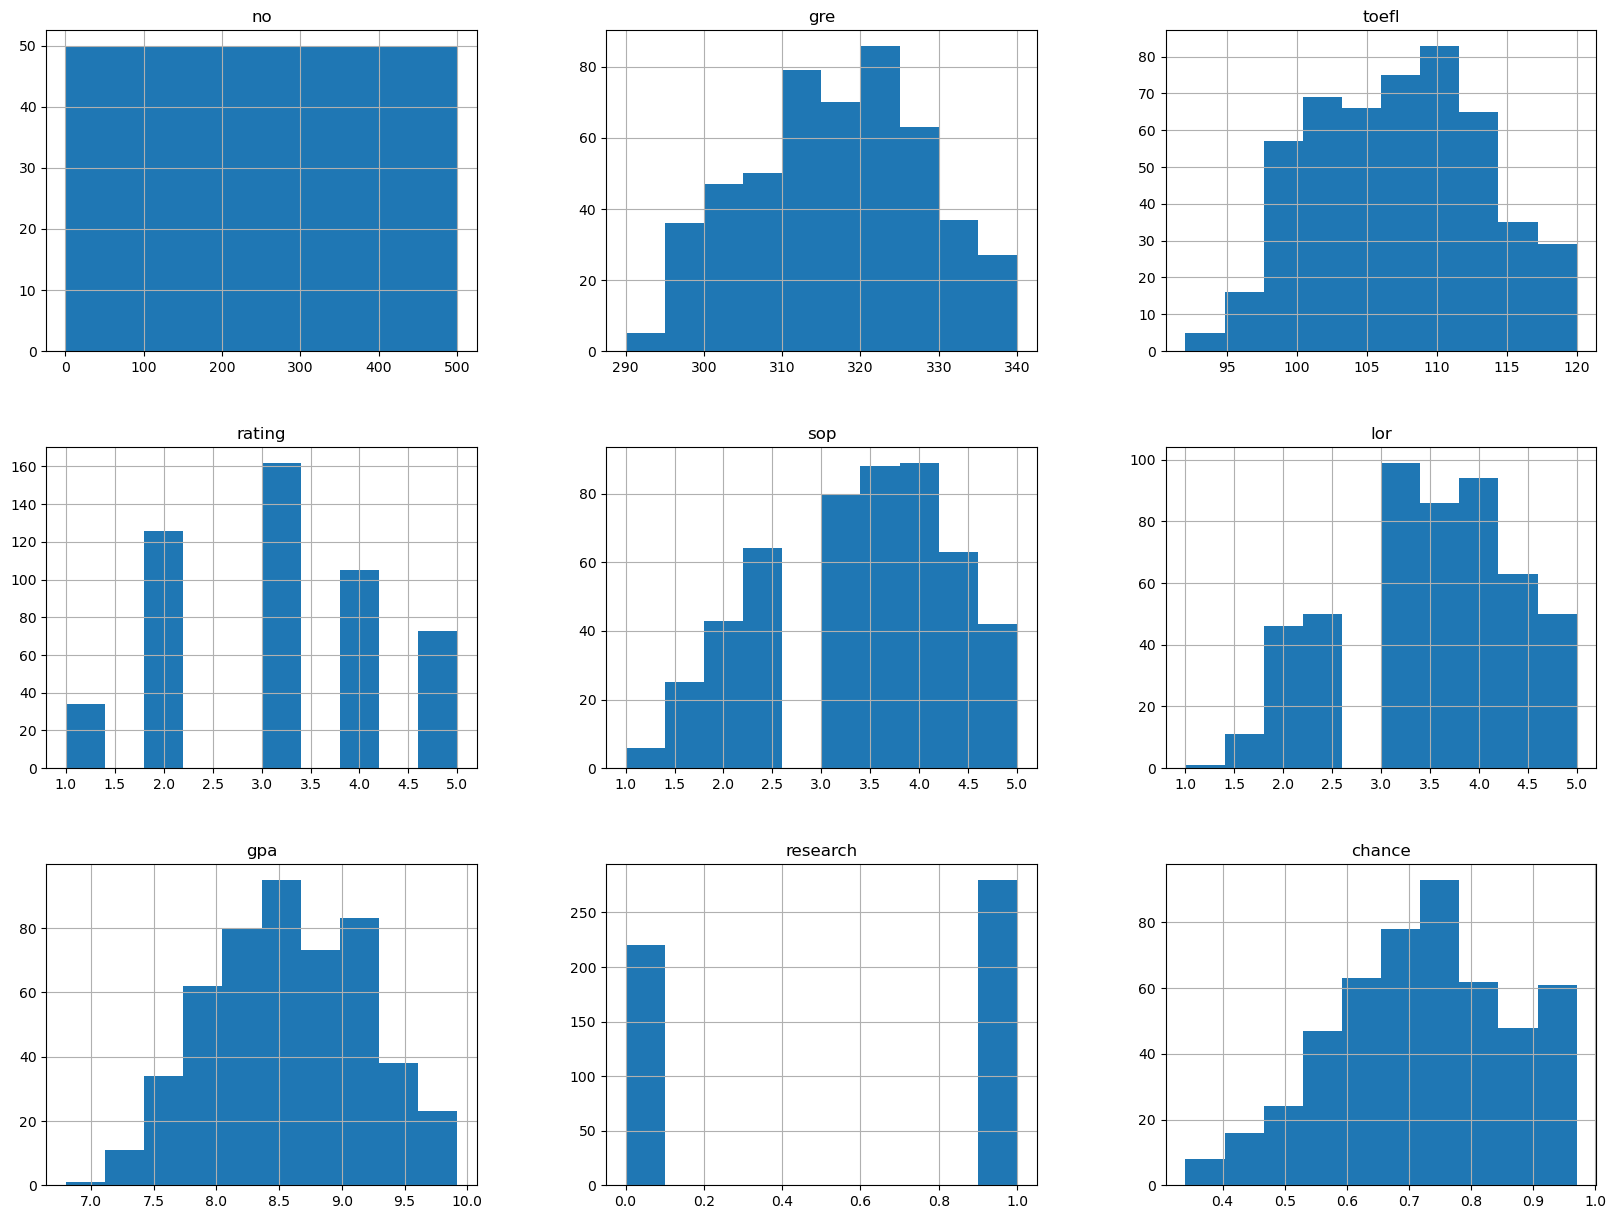

In [24]:
df.hist(bins=10, figsize=(20,15))
plt.show()

In [25]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance']
x=[i for i in var if i not in ['chance']]
x=df[x]

Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

Data normalization is important in order to represent data in comparable scales.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
scaler=StandardScaler()

In [37]:
arr= scaler.fit_transform(x)

In [38]:
df1= pd.DataFrame(arr)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif_df=pd.DataFrame()

In [41]:
vif_df['vif']= [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif_df['feature']=x.columns

In [42]:
vif_df

,vif,feature
0,4.464249,gre
1,3.904213,toefl
2,2.621036,rating
3,2.835210,sop
4,2.033555,lor
5,4.777992,gpa
6,1.494008,research


In [43]:
lr=LinearRegression()

In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
pickle.dump(lr,open('admission_lr_model_pickle','wb'))

In [46]:
!ls

 admission_lr_model_pickle    Hypothesis_Testing.ipynb	 Pandas2.ipynb
 Car_Price.ipynb	     'Linear Regression.ipynb'	 Pandas.ipynb
 Cleaned_Car.csv	      matplotlib.ipynb		 sample.csv
'EDA 1.ipynb'		      mongodb.ipynb		 seaborn.ipynb
'Feature Engineering.ipynb'   Pandas1.ipynb		 Untitled.ipynb


In [47]:
lr.predict([[316.558763,104.0,3.0,3.0,3.5,8.00,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.55657091])

In [48]:
test=scaler.transform([[322.000000	,110.0,	3.0,	3.5,	2.5,	8.67,	1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
lr.predict([[ 0.49051785,  0.46519653, -0.1078766 ,  0.12727117, -1.06433187,
         0.15484742,  0.88640526]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.41709775])

In [50]:
model=pickle.load(open('admission_lr_model_pickle','rb'))

In [51]:
model.predict(test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.41697635])

In [52]:
lr.score(x_test,y_test)

0.7664048993199384

In [53]:
x_test

,gre,toefl,rating,sop,lor,gpa,research
90,0.56,0.500000,0.25,0.750,0.750,0.358974,1.0
254,0.62,0.785714,0.75,0.750,1.000,0.743590,0.0
283,0.62,0.678571,0.50,0.375,0.500,0.673077,1.0
445,0.76,0.857143,1.00,0.875,1.000,0.730769,1.0
461,0.22,0.357143,0.50,0.375,0.250,0.426282,1.0
...,...,...,...,...,...,...,...
372,0.92,0.964286,0.75,0.875,0.750,0.903846,1.0
56,0.52,0.357143,0.50,0.250,0.500,0.192308,0.0
440,0.30,0.428571,0.25,0.375,0.125,0.317308,0.0
60,0.38,0.285714,0.25,0.500,0.500,0.416667,0.0


In [54]:
y_test

90     0.64
254    0.85
283    0.80
445    0.91
461    0.68
       ... 
372    0.95
56     0.64
440    0.53
60     0.48
208    0.64
Name: chance, Length: 100, dtype: float64

In [55]:
#let's create a function to calculate adjusted R-squared
def adj_r2(x,y):
  r2=lr.score(x,y)
  n=x.shape[0]
  p=x.shape[1]
  adjusted_r2= 1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [56]:
adj_r2(x_test,y_test)

0.7486313590508032

In [57]:
lr.intercept_

0.3405660378881121

In [58]:
lr.coef_

array([0.10707071, 0.07757083, 0.02222771, 0.00204125, 0.08165354,
       0.35896841, 0.02412567])

In [59]:
lassocv= LassoCV(alphas=None, cv=5, max_iter=2000000, normalize=True)
lassocv.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=5, max_iter=2000000, normalize=True)

In [60]:
lassocv.alpha_

4.7816776337090396e-05

In [61]:
lasso= Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=4.7816776337090396e-05)

In [62]:
lasso.score(x_test,y_test)

0.7667419276329637

In [63]:
ridgecv= RidgeCV(alphas=(0.1,1.0,10.0), cv=5, normalize=True)
ridgecv.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pip

RidgeCV(cv=5, normalize=True)

In [64]:
ridgecv.alpha_

0.1

In [65]:
np.random.uniform(0,10,50)

array([4.47919933, 3.31101132, 5.10410432, 6.24535519, 1.38477859,
       0.83652469, 0.71293886, 4.8554447 , 4.39388821, 8.63648722,
       7.18450022, 3.31721533, 1.82939017, 0.26726466, 4.74866187,
       9.4635028 , 6.46398416, 9.89738207, 2.69805387, 9.38115733,
       4.18491138, 1.24337302, 0.29884281, 9.13048874, 7.41057555,
       6.3042327 , 9.04161495, 1.95689369, 5.68845802, 6.32043999,
       5.08650083, 8.54151968, 3.20684525, 0.11730184, 6.30607801,
       4.07001058, 5.24613967, 2.95515568, 7.42320507, 5.81385271,
       0.1308919 , 9.01378827, 2.12086171, 5.47177008, 3.41035787,
       8.02293833, 2.43317345, 0.39957494, 5.85028964, 5.28931844])

In [66]:
ridge_lr= Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(x_train,y_train)

Ridge(alpha=0.1)

In [67]:
ridge_lr.score(x_test,y_test)

0.7661924045357233

In [68]:
elastic= ElasticNetCV(alphas=None, cv=10)
elastic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [69]:
elastic.alpha_

0.0002997636702655137

In [70]:
elastic.l1_ratio_

0.5